In [65]:
#https://matplotlib.org/gallery/color/named_colors.html
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 
import seaborn as seabornInstance
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
col_data = {
    'Tweet ID' : str, 
    'Username' : str, 
    'Timestamp': str,
    'Follower' : int,
    'Friends'  : int,
    'Favorites': int,
    'Retweets' : int,
    'Entities' : str,
    'Sentiment': str,
    'Mentions' : str,
    'Hashtags' : str,
    'URLs'     : str
}

cols = ["Follower","Friends","Favorites",'Retweets']


In [67]:
data = pd.read_csv("/Users/macbookretina/Desktop/TweetsCOV19.tsv",sep='\t',dtype=col_data, parse_dates=True, names= list(col_data.keys()),error_bad_lines=False, usecols = cols,quoting=csv.QUOTE_NONE)
test = pd.read_csv("/Users/macbookretina/Desktop/testtdata.tsv",sep='\t',header=None,quoting=csv.QUOTE_NONE)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961183 entries, 0 to 961182
Data columns (total 10 columns):
0    961183 non-null object
1    961183 non-null object
2    961183 non-null int64
3    961183 non-null int64
4    961183 non-null int64
5    961183 non-null object
6    961183 non-null object
7    959180 non-null object
8    960714 non-null object
9    961183 non-null object
dtypes: int64(3), object(7)
memory usage: 73.3+ MB


/Users/macbookretina/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


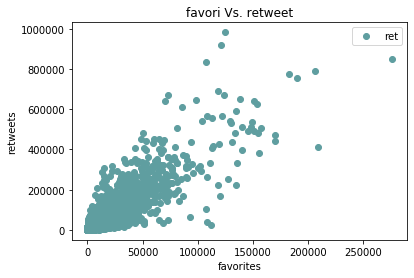

In [68]:
# define the x & y data.
x = data['Favorites']
y = data['Retweets']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'ret')

# make sure it's formatted.
plt.title("favori Vs. retweet")
plt.xlabel("favorites")
plt.ylabel("retweets")
plt.legend()

plt.show()

In [69]:
X = data[['Favorites']]
Y = data['Retweets']
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
Y_test = test[[4]]
Y_pred = regr.predict(Y_test)
for i in range(len(Y_pred)):
    if Y_pred[i]<0:
        Y_pred[i]=0
Y_pred

array([0.        , 0.        , 0.        , ..., 3.45758126, 0.        ,
       3.45758126])

In [71]:
df = pd.DataFrame({'Predicted': Y_pred})
df['Predicted']

0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
5            0.000000
6            0.000000
7            3.457581
8            0.000000
9            0.000000
10           0.000000
11          72.298014
12           0.000000
13           0.000000
14           0.000000
15           0.000000
16           0.000000
17        1206.353557
18           0.000000
19           0.000000
20         517.949233
21           0.000000
22           0.000000
23           0.000000
24           0.000000
25           0.000000
26           7.080762
27         123.022543
28          28.819846
29           0.000000
             ...     
961153       0.000000
961154       0.000000
961155       0.000000
961156       0.000000
961157       0.000000
961158       0.000000
961159       0.000000
961160       0.000000
961161      10.703943
961162       0.000000
961163       0.000000
961164       0.000000
961165       0.000000
961166       0.000000
961167    

In [72]:
file = open("/Users/macbookretina/Desktop/test.predict","w")
for i in df['Predicted']:
    file.write(str(int(i))+'\n')
file.close()